In [1]:
import pyanitools as pyt
import pyaniasetools as aat
import hdnntools as hdt
import numpy as np

In [2]:
#----------------Parameters--------------------
mol = '/home/jujuman/Research/Test/check_data2/ad_H28O14_12-048.dat'

#wkdir = '/home/jujuman/Research/DataReductionMethods/model6r/model-gdb_r06_comb09_1/cv4/'
#cnstfile = wkdir + 'rHCNO-4.6A_16-3.1A_a4-8.params'
#saefile  = wkdir + 'sae_6-31gd.dat'
#nnfdir   = wkdir + '/train'

wkdir = '/home/jujuman/Research/DataReductionMethods/al_working_network/ANI-AL-0808.0302.0400/'
cnstfile = wkdir + 'train0/rHCNOSFCl-4.6A_16-3.1A_a4-8.params'
saefile  = wkdir + 'train0/sae_wb97x-631gd.dat'
nnfdir   = wkdir + 'train'

Nn = 5
#----------------------------------------------

In [3]:
# Define the conformer cross validator class
anicv = aat.anicrossvalidationconformer(cnstfile,saefile,nnfdir,Nn,0,False)

In [4]:
data = hdt.readncdatall(mol)

In [5]:
# Extract the data
X  = data['coordinates']
S  = data['species']
Edft = hdt.hatokcal*data['energies']
Fdft = hdt.hatokcal*data['forces']#/(0.52917724900001*0.52917724900001)

# Calculate std. dev. per atom for all conformers
sigma = anicv.compute_stddev_conformations(X, S)

# Calculate energy deltas
Eani, Fani = anicv.compute_wa_energy_conformations(X, S)
#Eani = np.mean(Eani,axis=0)

In [6]:
print(sigma)

[ 0.44240106  0.64462158  0.21637484  0.22632128  0.31086591  0.38939812
  0.4462921   0.26476292  0.16509969  0.41828641  0.47005303  0.6096517
  0.19212944  0.21442411  0.29095115  0.27365796  0.25894539  0.32710475
  0.47521767  0.46764664  0.30565799  0.36685784  0.69963771  0.322016
  0.33234399  0.12271309  0.42245289  0.35842373  0.36749145  0.48967148
  0.5410784   0.42369251  0.45521023  0.26523287  0.28605172  0.54283284
  0.50748937  0.43446673  0.1679204   0.36916642  0.22900854  0.2205443
  0.56079828  0.40675246  0.3165018   0.42838568  0.27307895  0.3776725 ]


In [7]:
for i,(e,s) in enumerate(zip(np.abs(Eani-Edft),sigma)):
    print(i,e,s)

0 3.90347535897 0.442401059988
1 0.835889759124 0.64462157993
2 0.0619787664618 0.216374841275
3 1.0834233443 0.226321279849
4 0.922079122858 0.310865906454
5 1.51291751489 0.389398119756
6 1.51549683965 0.446292097597
7 0.912303072866 0.264762919276
8 2.66420235555 0.165099685922
9 5.38221199636 0.418286408412
10 2.65624818509 0.470053029543
11 0.123769698548 0.609651695365
12 2.40606765915 0.192129435647
13 3.20755705866 0.214424113012
14 2.88995073386 0.290951151175
15 0.792026667856 0.273657959208
16 0.261891756789 0.258945394231
17 0.124138191692 0.327104747652
18 2.87464626844 0.475217672378
19 0.547641065554 0.467646637316
20 1.66708652268 0.305657986786
21 2.87781005388 0.366857841561
22 2.87922144262 0.699637707958
23 5.83698944608 0.322016004831
24 0.203773266869 0.33234399039
25 3.035294584 0.122713090222
26 0.779822628829 0.42245289116
27 1.51174054155 0.358423727469
28 0.591191834072 0.36749144861
29 1.30004860368 0.489671478682
30 1.31759009825 0.541078403468
31 1.8293776

In [8]:
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/home/jujuman/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


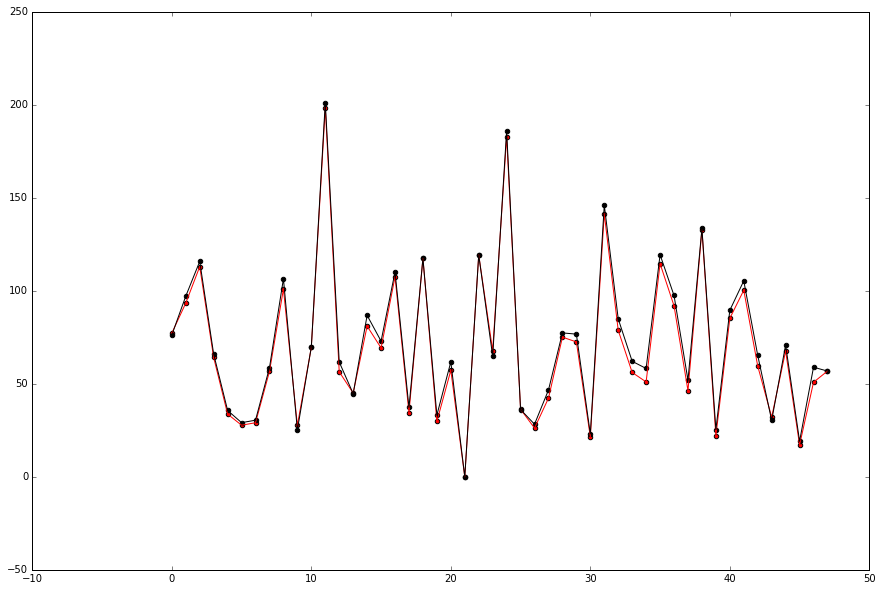

In [9]:
#Eani = -0.5*(Eani)
#Edft = -0.5*(Edft)
#Emp2 = -0.5*(Emp2)

Eani = Eani - Eani.min()
Edft = Edft - Edft.min()

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

plt.scatter(np.arange(Eani.size),Eani,c='r')
plt.plot(np.arange(Eani.size),Eani,c='r')
plt.scatter(np.arange(Edft.size),Edft,c='black')
plt.plot(np.arange(Edft.size),Edft,c='black')
plt.show()

Populating the interactive namespace from numpy and matplotlib


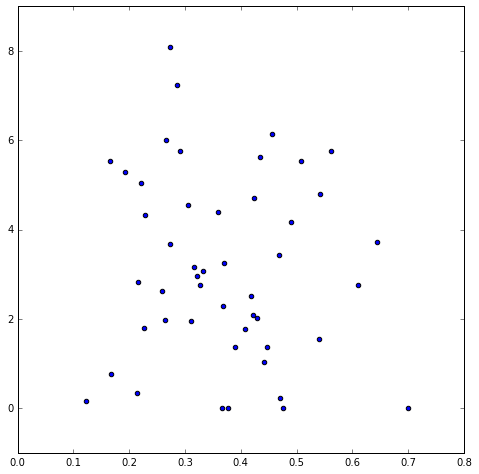

In [10]:
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 8)
plt.scatter(sigma,np.abs(Eani-Edft))
plt.show()

Populating the interactive namespace from numpy and matplotlib


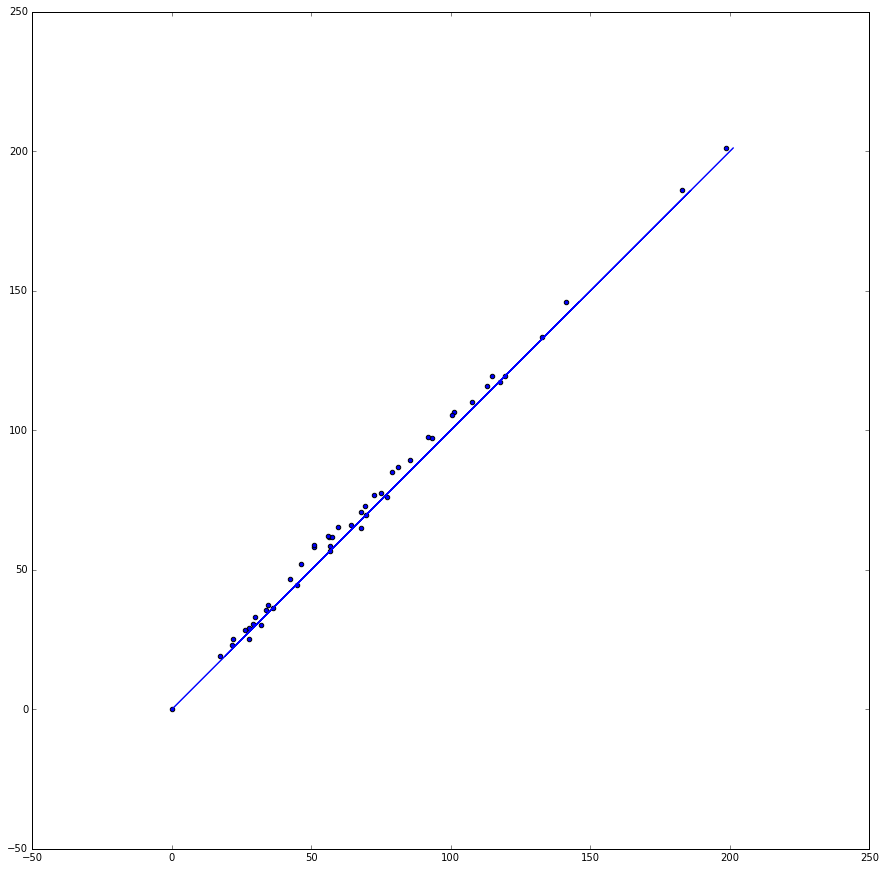

In [11]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 15)
plt.plot(Edft,Edft)
plt.scatter(Eani,Edft)
plt.show()

In [12]:
print(hdt.calculaterootmeansqrerror(Edft,Eani))
print(hdt.calculatemeanabserror(Edft,Eani))

3.75099970944
3.13275433922


In [13]:
6.72007890142
5.50766976943

5.50766976943